In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
st="2022-04-20 09:00:00"
end="2022-04-21 18:00:00"
start=datetime.timestamp(datetime.strptime(st, '%Y-%m-%d %H:%M:%S'))
end=datetime.timestamp(datetime.strptime(end, '%Y-%m-%d %H:%M:%S'))

In [5]:
response = requests.get('http://3.95.210.23:5000/pred/slot',json={'start':start,'end':end,'token':'atharva123'})
l=response.json()
response = requests.get('http://3.95.210.23:5000/pred/cust',json={'start':start,'end':end,'token':'atharva123'})
l1=response.json()

Start datetime =  2022-04-21 13:00:44.254983
End datetime =  2022-04-21 13:09:20.223778
Slot  1


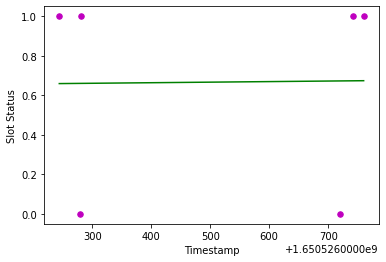

Slot  2


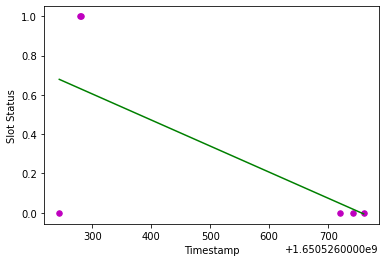

Slot  3


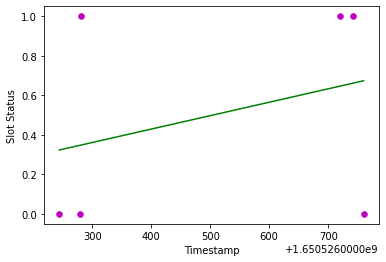

In [6]:
x=np.array(l[0])
y=l[1]
b=l[2]
x1=[datetime.fromtimestamp(x[0]),datetime.fromtimestamp(x[len(x)-1])]
print("Start datetime = ",x1[0])
print("End datetime = ",x1[1])
#figure, axis = plt.subplots(1, len(y))
for i in range(len(y)):
    y_pred = b[i][0] + b[i][1]*x
    print('Slot ',i+1)
    plt.scatter(x, np.array(y[i]), color = "m", marker = "o", s = 30)
    plt.plot(x, y_pred, color = "g")
    plt.ylabel('Slot Status')
    plt.xlabel('Timestamp')
    plt.show()

In [7]:
ps=[]
for i in y:
    s=0
    for j in i:
        s+=j
    ps.append(s)
m=ps[0]
max_pos=0
for i in range(len(ps)):
    if(m<ps[i]):
        m=ps[i]
        max_pos=i+1
print("Most Booked Slot is slot no.=",max_pos)

Most Booked Slot is slot no.= 0


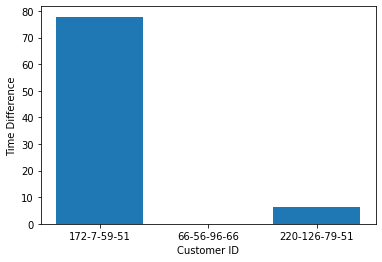

In [8]:
c=l1[0]
t=l1[-1]
#print(c1,t1)
plt.bar(c,t)
plt.xlabel('Customer ID')
plt.ylabel('Time Difference')
plt.show()

In [20]:
l

[[1650347228.715671, 1650347229.800146],
 [[0, 0], [0, 0], [1, 0]],
 [[0.0, -0.0], [0.0, -0.0], [-873905.9346594561, 0.0005295288283377886]]]